# Dog Breed Prediction 

### Exploratory Data Analysis

In [1]:
from PIL import Image
from matplotlib import image
import matplotlib.pyplot as plt

images_dir = "./data/images/"

In [4]:
def get_image_info(image_file):
    im = Image.open(f'{image_file}')
    print("Image Format: ", im.format)
    print("Image Mode: ", im.mode)
    print("Image Size: ", im.size)
    data = image.imread(f'{image_file}')

    print("datatype: ", data.dtype)
    print("shape: ", data.shape)

    plt.imshow(data)
    plt.show()

Image Format:  JPEG
Image Mode:  RGB
Image Size:  (289, 450)
datatype:  uint8
shape:  (450, 289, 3)


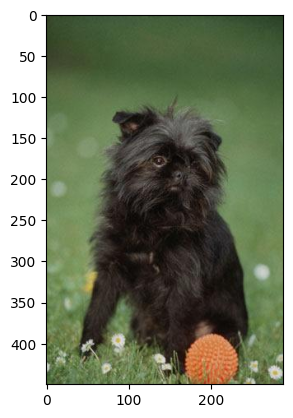

In [5]:
get_image_info(f'{images_dir}affenpinscher-7.jpg')

Image Format:  JPEG
Image Mode:  RGB
Image Size:  (500, 375)
datatype:  uint8
shape:  (375, 500, 3)


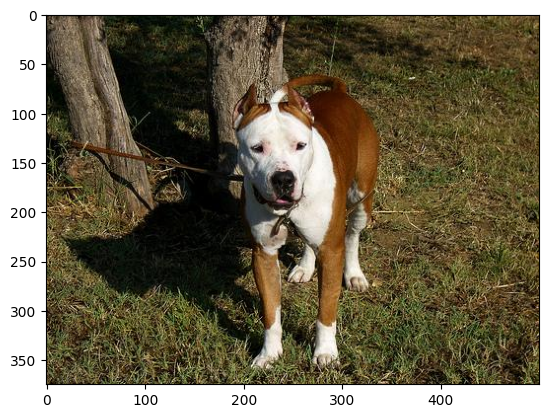

In [6]:
get_image_info(f'{images_dir}American Staffordshire terrier-1.jpg')

Image Format:  JPEG
Image Mode:  RGB
Image Size:  (500, 375)
datatype:  uint8
shape:  (375, 500, 3)


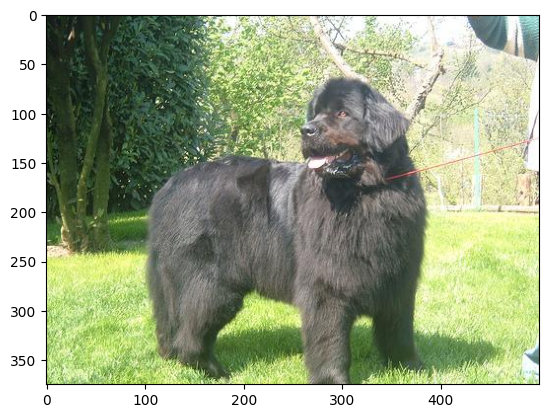

In [7]:
get_image_info(f'{images_dir}Newfoundland-148.jpg')

In [8]:
import os
import pandas as pd

def gather_image_info(directory):
    image_data = []

    # Iterate over each file in the directory
    for filename in os.listdir(directory):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
            filepath = os.path.join(directory, filename)
            try:
                with Image.open(filepath) as img:
                    info = {
                        'Filename': filename,
                        'File Type': img.format,
                        'Shape': img.size,
                        'Image Mode': img.mode
                    }
                    image_data.append(info)
            except IOError:
                print(f"Cannot open {filename}")
                
    df = pd.DataFrame(image_data)
    return df


image_info_df = gather_image_info(images_dir)

/tmp/ipykernel_30797/1721265482.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [9]:
print(image_info_df.head())

                 Filename File Type       Shape Image Mode
0     Walker hound-62.jpg      JPEG  (200, 200)        RGB
1  Norfolk terrier-71.jpg      JPEG  (430, 380)        RGB
2     Walker hound-68.jpg      JPEG  (209, 209)        RGB
3  German shepherd-66.jpg      JPEG  (360, 333)        RGB
4            chow-140.jpg      JPEG  (500, 333)        RGB


In [10]:
image_info_df.describe()

Filename File Type       Shape Image Mode
count                 20580     20580       20580      20580
unique                20580         2        4542          2
top     Walker hound-62.jpg      JPEG  (500, 375)        RGB
freq                      1     20579        5301      20579

In [11]:
not_jpeg_images = image_info_df[image_info_df['File Type'] != 'JPEG']
print(not_jpeg_images)

                      Filename File Type       Shape Image Mode
9624  Shetland sheepdog-23.jpg       PNG  (213, 189)       RGBA


Image Format:  PNG
Image Mode:  RGBA
Image Size:  (213, 189)
datatype:  float32
shape:  (189, 213, 4)


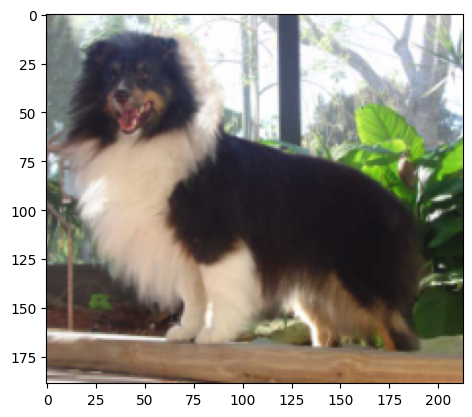

In [12]:
get_image_info(f'{images_dir}Shetland sheepdog-23.jpg')

Note that from what is shown above, the image "Shetland sheepdog-23.jpg" is not like the rest of the images as it has 4 color channels and is a PNG image. As this is the only image like this, we will remove the image from the data set. This is curious because the image ends with the '.jpg' file type, but it has 4 color channels. 

Other than that everything looks good. ALl images seem to be JPEG images with 3 color channels, RGB. One issue is that the images are all of different sizes, so we will have to resize all of the images.

## Preprocessing and Processing Data

In [13]:
# We will be resizing the images to (224, 224, 3)
img_width, img_height = 128, 128 # 224, 224 
input_shape = (img_height, img_height, 3)
channels = 3
image_arr_size= img_width * img_height * channels

In [14]:
import os
import numpy as np
from PIL import Image

def load_images_and_labels(directory, exclude_file='Shetland sheepdog-23.jpg'):
    images = []
    labels = []
    
    for filename in os.listdir(directory):
        if filename.lower().endswith('.jpg') and filename != exclude_file:
            file_path = os.path.join(directory, filename)
            
            with Image.open(file_path) as img:
                img = img.convert('RGB')
                img = img.resize((img_width, img_height))
                # img = img.resize((224, 224))

                images.append(np.array(img))
            
                label = filename.split('-')[0]
                labels.append(label)
    
    images = np.array(images)
    labels = np.array(labels)
    
    return images, labels

images, labels = load_images_and_labels(images_dir)

In [15]:
print("Loaded", images.shape[0], "images.")
print("Images shape:", images.shape[1:])
print("Labels:", labels)
print(f"There are {len(np.unique(labels))} unique labels")

Loaded 20579 images.
Images shape: (128, 128, 3)
Labels: ['Walker hound' 'Norfolk terrier' 'Walker hound' ... 'Irish setter' 'pug'
 'Pekinese']
There are 120 unique labels


In [16]:
import pandas as pd
labels_pd = pd.DataFrame(labels)
labels_pd.info()
labels_pd.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20579 entries, 0 to 20578
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       20579 non-null  object
dtypes: object(1)
memory usage: 160.9+ KB


0
count         20579
unique          120
top     Maltese dog
freq            252

In [17]:
print(images[1][1][1]) # first image, on pixel x=1, y=1, gives the RGB values

[133 147 132]


Normalizing data

In [18]:
def normalize(image_array):
    data_all_resized = []
    for image in image_array:
        image_resized = np.array(image, dtype=np.float32) / 255.0
        img_array = np.array(image_resized)
        data_all_resized.append(img_array)
        
    return np.array(data_all_resized)

In [19]:
images = normalize(images)

In [20]:
print(images[1][1][1]) # images are now normalized

[0.52156866 0.5764706  0.5176471 ]


### Splitting Data for testing and training

*Note: gonna try using train_test_split because I like it, may have memory issues but we'll see*

Breed: Pomeranian


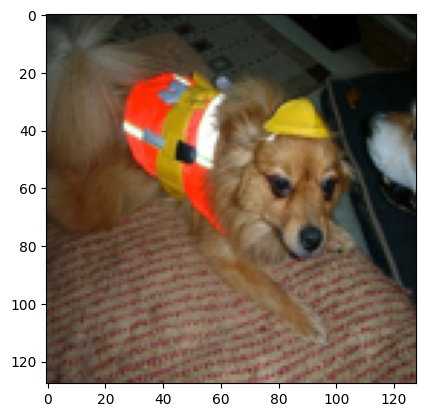

In [21]:
index = 100

plt.imshow(images[index])

predicted_class = labels[index]
print("Breed:",predicted_class)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()

X = images
y = label_encoder.fit_transform(labels)
y_cat = to_categorical(y, 120)

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.25, stratify=y, random_state=1)

2024-05-02 19:48:34.252030: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-02 19:48:35.439690: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-02 19:48:35.439821: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-02 19:48:35.714862: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-02 19:48:36.199337: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-02 19:48:36.213669: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [24]:
# confirming split and one hot encoding worked and we can reverse it.
i = 10
one_hot_index = np.argmax(y_cat[i]) 
original_label = label_encoder.inverse_transform([one_hot_index])  
print(f"Original label: {labels[i]}, \nEncoded integer: {y[i]}, \nOne-hot: {y_cat[i]}, "
      f"\nBack to int: {one_hot_index}, \nBack to label: {original_label[0]}")

Original label: English setter, 
Encoded integer: 21, 
One-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], 
Back to int: 21, 
Back to label: English setter


In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15434, 128, 128, 3)
(15434, 120)
(5145, 128, 128, 3)
(5145, 120)


## At this point we have:

- Loaded the data, visualized it, checked for characteristics such as image size, format, etc.
- Put the data into python data types (np.arrays) as the variables data_all and labels_all, which holds all the data.
- Rescaled the data to (224, 224, 3)
- Normalized the data
- Split the data into testing and training sets

## Model design, training and evaluation

#### Callback functions

In [26]:
# From class notes: 
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, CSVLogger, ModelCheckpoint

# # These will be specific to each model
# checkpoint = ModelCheckpoint(
#     'model.keras',
#     monitor='val_loss',
#     verbose=1,
#     save_best_only=True,
#     mode='auto',
#     save_weights_only=False,
#     period=1
# )

# csvlogger = CSVLogger(
#     filename= "training_model_csv.log",
#     separator = ",",
#     append = False
# )

earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=3,
    verbose=1,
    mode='auto'
)

reduceLR = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1, 
    mode='auto'
)

## Artificial Nueral Network
Not using this architecture, had terrible results and takes forevery to train.

In [27]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

# image_arr_size = input_shape
image_size = input_shape
# image_size = (224, 224, 3)
image_arr_size = img_width * img_height * channels


Ann = Sequential() # initialize model

Ann.add(Flatten(input_shape=image_size)) # input layer

Ann.add(Dense(512, activation='relu', input_shape=(image_arr_size,)))
Ann.add(Dense(256, activation='relu'))
Ann.add(Dense(128, activation='relu'))
Ann.add(Dense(64, activation='relu'))

# output layer
Ann.add(Dense(120, activation='softmax')) # using softmax because its a multi-classification problemAnn.summary()

In [28]:
Ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 512)               25166336  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 120)               7800      
                                                                 
Total params: 25346616 (96.69 MB)
Trainable params: 2534

In [29]:
from tensorflow.keras.models import load_model

# # ANN will not work at all
# if os.path.isfile("./models/Ann.keras"):
#     Ann = load_model('./models/Ann.keras')

# else: # this takes like an hour to run 
#     Ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     Ann.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=64, verbose=2)
#     Ann.save("./models/Ann.keras")

I was attempting to run an ANN on the data, however the outcome was terrible and it took hours to run, therefore it is not worth it. Bad model.

## Lenet-5

In [31]:
from tensorflow.keras.layers import Flatten, Conv2D, AveragePooling2D

lenet5 = Sequential()

# Layer 1: Convolutional layer with 6 filters of size 5x5, followed by average pooling
lenet5.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=image_size))
lenet5.add(AveragePooling2D(pool_size=(2, 2)))

# Layer 2: Convolutional layer with 16 filters of size 5x5, followed by average pooling
lenet5.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
lenet5.add(AveragePooling2D(pool_size=(2, 2)))

# Flatten the feature maps to feed into fully connected layers
lenet5.add(Flatten())

# Layer 3: Fully connected layer with 120 neurons
lenet5.add(Dense(120, activation='relu'))

# Layer 4: Fully connected layer with 84 neurons
lenet5.add(Dense(84, activation='relu'))

# Output layer: Fully connected layer with num_classes neurons (e.g., 10 for MNIST)
lenet5.add(Dense(120, activation='softmax'))

In [32]:
lenet5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 124, 124, 6)       456       
                                                                 
 average_pooling2d_2 (Avera  (None, 62, 62, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 16)        2416      
                                                                 
 average_pooling2d_3 (Avera  (None, 29, 29, 16)        0         
 gePooling2D)                                                    
                                                                 
 flatten_2 (Flatten)         (None, 13456)             0         
                                                                 
 dense_8 (Dense)             (None, 120)              

In [37]:
checkpoint = ModelCheckpoint(
    './models/lenet5.keras',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='auto',
    save_weights_only=False,
    save_frequency="epoch"
)

csvlog = CSVLogger(
    filename= "./models/training_lenet5_csv.log",
    separator = ",",
    append = False
)

callbacks = [checkpoint, earlystop, csvlog, reduceLR]

In [40]:
from keras.optimizers import Adam

if os.path.isfile("./models/lenet5.keras"):
    lenet5 = load_model('./models/lenet5.keras')

else: # this takes like an hour to run 
    lenet5.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    lenet5.fit(X_train, y_train, validation_split=0.2, epochs=15, batch_size=32, verbose=2, callbacks=callbacks)
    lenet5.save("./models/lenet5.keras")

In [41]:
test_loss, test_accuracy = lenet5.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Test Loss: 4.475693702697754
Test Accuracy: 0.053449951112270355


In [42]:
y_pred = lenet5.predict(X_test)
y_pred_flat = [item for item in y_pred]
y_pred_rounded = np.round(y_pred_flat)

161/161 [==============================] - 4s 22ms/step


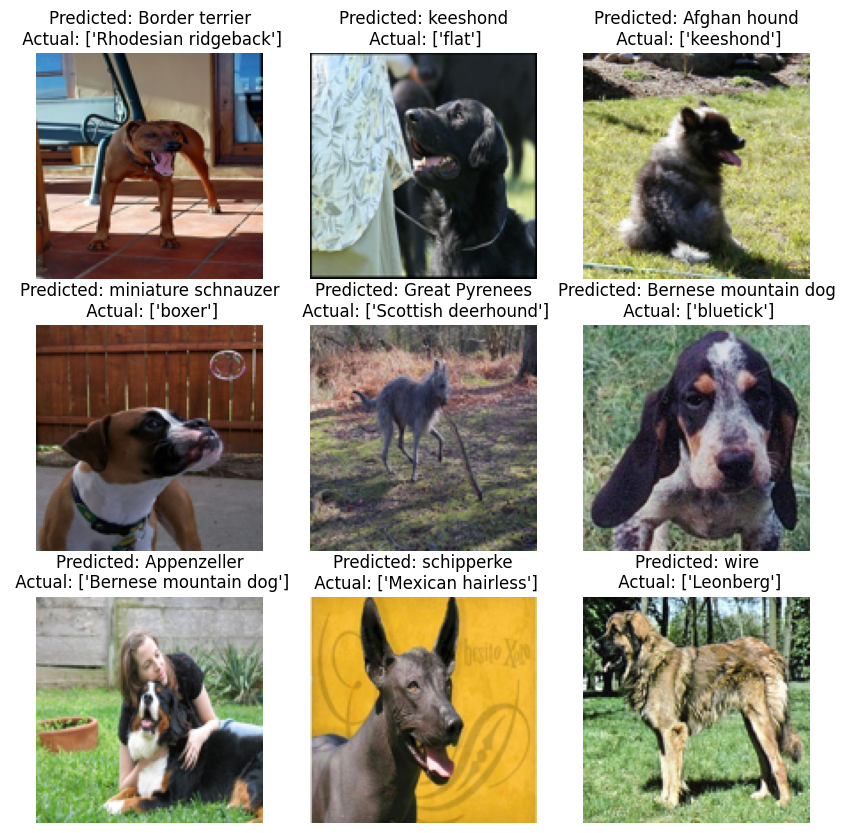

In [45]:
plt.figure(figsize=(10, 10))

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i])
    predicted_class = np.argmax(y_pred[i])
    predicted_label = label_encoder.inverse_transform([predicted_class])
    true_class = np.argmax(y_test[i])
    true_label = label_encoder.inverse_transform([true_class])
    plt.title(f"Predicted: {predicted_label[0]}\n Actual: {true_label}")
    plt.axis("off")

This model did terrible

## Inception V3 Mod

In [46]:
from tensorflow.keras.applications.inception_v3  import InceptionV3
from tensorflow.keras.layers import InputLayer, Resizing, Dropout


inception_model = InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape= (299, 299, 3),    #(299, 299, 3),
    pooling="max",
    classes=1,
    classifier_activation="relu",
)

for layer in inception_model.layers:
    layer.trainable = False

inception = Sequential()

inception.add(InputLayer(input_shape=input_shape))

inception.add(Resizing(height=299, width=299)) # inception needs 299x299 images

inception.add(inception_model)
inception.add(Dropout(0.2))
inception.add(Dense(120,activation='softmax'))

In [47]:
inception.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 299, 299, 3)       0         
                                                                 
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_11 (Dense)            (None, 120)               245880    
                                                                 
Total params: 22048664 (84.11 MB)
Trainable params: 245880 (960.47 KB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [48]:
from tensorflow.keras.models import load_model

checkpoint = ModelCheckpoint(
    './models/inception.keras',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='auto',
    save_weights_only=False,
    save_frequency="epoch"
)

csvlogger = CSVLogger(
    filename= "./models/training_inception_csv.log",
    separator = ",",
    append = False
)

callbacks = [checkpoint, earlystop, csvlog, reduceLR]

if os.path.isfile("./models/inception.keras"):
    inception = load_model('./models/inception.keras')

else: # this takes like an hour to run 
    inception.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    inception.fit(X_train, y_train, validation_split=0.3, epochs=20, batch_size=128, verbose=2, callbacks=callbacks)
    inception.save("./models/inception.keras")

In [49]:
test_loss, test_accuracy = inception.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Test Loss: 1.1743195056915283
Test Accuracy: 0.7805636525154114


In [54]:
y_pred = inception.predict(X_test)
y_pred_flat = [item for item in y_pred]
y_pred_rounded = np.round(y_pred_flat)

161/161 [==============================] - 144s 887ms/step


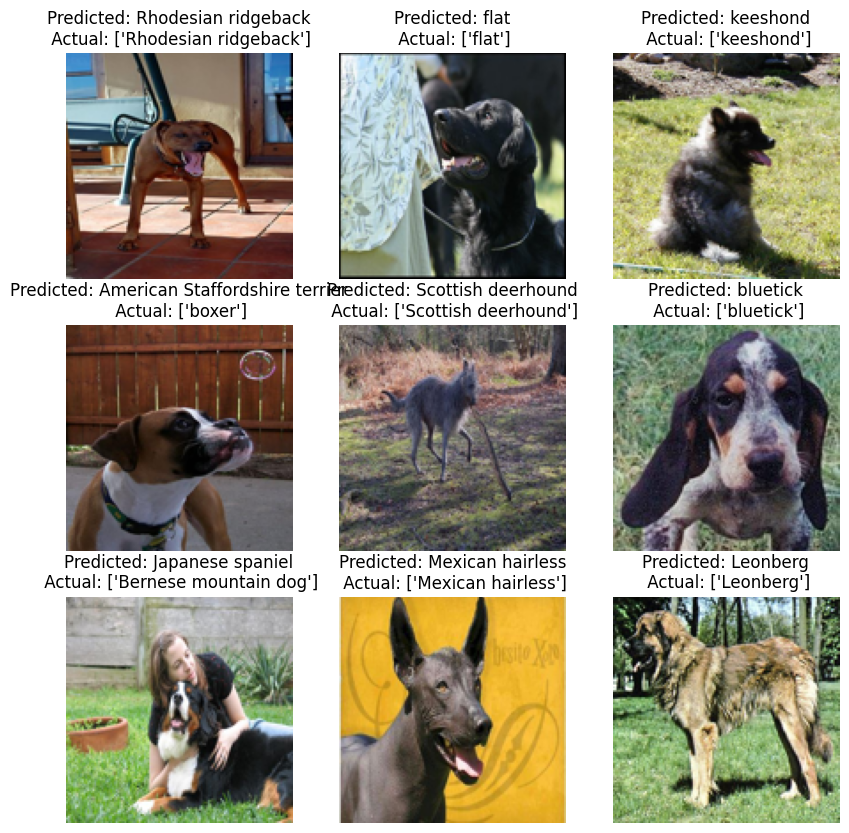

In [55]:
plt.figure(figsize=(10, 10))

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i])
    predicted_class = np.argmax(y_pred[i])
    predicted_label = label_encoder.inverse_transform([predicted_class])
    true_class = np.argmax(y_test[i])
    true_label = label_encoder.inverse_transform([true_class])
    plt.title(f"Predicted: {predicted_label[0]}\n Actual: {true_label}")
    plt.axis("off")

This model did much better. As we can see, the images it missed (4 and 7) each were somewhat unclear. Most notable, image 7 has a human in the picture and the dog is partially covered. Due to the limited training, we'll give out model a pass on this one. 

### VGG 16 Model

In [56]:
from keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import InputLayer, Resizing, Dropout, BatchNormalization


input_shape = image_size

vgg_model_base = VGG16(weights='imagenet', include_top = False, input_shape=input_shape)
vgg_model_base.summary()

for layer in vgg_model_base.layers:
    layer.trainable = False

# Initializing the model
vgg_model = Sequential()

vgg_model.add(vgg_model_base)

vgg_model.add(Flatten())
vgg_model.add(Dropout(0.2))
vgg_model.add(Dense(2048, activation='relu'))
vgg_model.add(BatchNormalization())
vgg_model.add(Dropout(0.4))
vgg_model.add(Dense(2048, activation='relu'))
vgg_model.add(BatchNormalization())
vgg_model.add(Dropout(0.2))
vgg_model.add(Dense(120, activation='softmax'))


vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [58]:
# Compiling the model

checkpoint = ModelCheckpoint(
    './models/vgg16.keras',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='auto',
    save_weights_only=False,
    save_frequency="epoch"
)

csvlogger = CSVLogger(
    filename= "./models/training_vgg16_csv.log",
    separator = ",",
    append = False
)

callbacks = [checkpoint, earlystop, csvlog, reduceLR]


if os.path.isfile("./models/vgg16.keras"):
    vgg_model = load_model('./models/vgg16.keras')
else:
    vgg_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    vgg_model.fit(X_train, y_train, validation_split=0.3, epochs=20, batch_size=64, verbose=2, callbacks=callbacks) 
    vgg_model.save("./models/vgg16.keras")

In [59]:
test_loss, test_accuracy = vgg_model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Test Loss: 3.4104490280151367
Test Accuracy: 0.22176870703697205


In [60]:
y_pred = vgg_model.predict(X_test)
y_pred_flat = [item for item in y_pred]
y_pred_rounded = np.round(y_pred_flat)

161/161 [==============================] - 116s 719ms/step


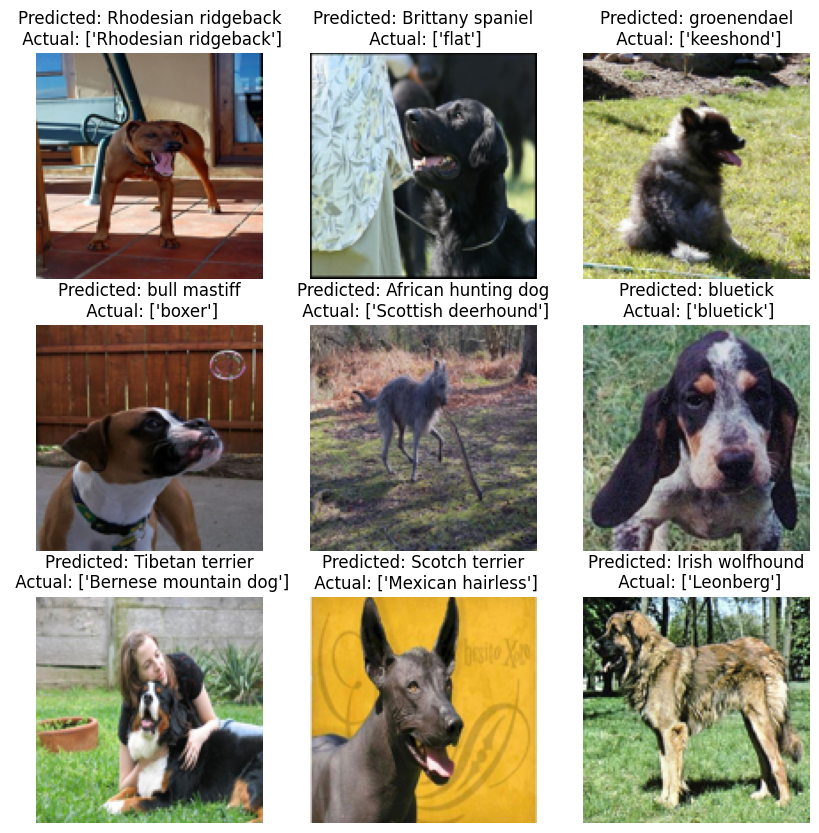

In [61]:
plt.figure(figsize=(10, 10))

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i])
    predicted_class = np.argmax(y_pred[i])
    predicted_label = label_encoder.inverse_transform([predicted_class])
    true_class = np.argmax(y_test[i])
    true_label = label_encoder.inverse_transform([true_class])
    plt.title(f"Predicted: {predicted_label[0]}\n Actual: {true_label}")
    plt.axis("off")

This model is pretty bad too, but it did pick up on some features.

### Miscellaneous

#### ANN

#### Lenet5

#### Inception V3

#### VGG 16